# Exercise 03, Part 2: Spatialisation

In this part of the exercise, we shall perform spatialisation of multidimensional (multi-attribute) data by means of the method called Multi-Dimensional Scaling, abbreviated as MDS. We shall apply MDS to data obtained by aggregating the original storm-related tweets into hourly counts and percentages of occurrences of different keywords. Attempts to apply MDS to the original data failed because the method is not very efficient and takes too much time to run when the number of data records is large.

After loading the aggregated data, we shall first spatialise the keywords according to the temporal variation of their occurrences, and then we shall spatialise the hourly intervals according to the occurrences of the keywords.

In [3]:
# Importing Libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

#from sklearn.decomposition import PCA
from sklearn.manifold import MDS

import folium

from collections import Counter

pd.set_option("display.max.columns", None)

np.random.seed(123)


### Load aggregated data describing the temporal variation of the keyword occurrences

In [10]:
# Loading csv file into Pandas DataFrame
kw = pd.read_csv('keywords.csv')
print(kw.size)
kw

3498


,id,Name,27.03;00: count,27.03;01: count,27.03;02: count,27.03;03: count,27.03;04: count,27.03;05: count,27.03;06: count,27.03;07: count,27.03;08: count,27.03;09: count,27.03;10: count,27.03;11: count,27.03;12: count,27.03;13: count,27.03;14: count,27.03;15: count,27.03;16: count,27.03;17: count,27.03;18: count,27.03;19: count,27.03;20: count,27.03;21: count,27.03;22: count,27.03;23: count,28.03;00: count,28.03;01: count,28.03;02: count,28.03;03: count,28.03;04: count,28.03;05: count,28.03;06: count,28.03;07: count,28.03;08: count,28.03;09: count,28.03;10: count,28.03;11: count,28.03;12: count,28.03;13: count,28.03;14: count,28.03;15: count,28.03;16: count,28.03;17: count,28.03;18: count,28.03;19: count,28.03;20: count,28.03;21: count,28.03;22: count,28.03;23: count,29.03;00: count,29.03;01: count,29.03;02: count,29.03;03: count,29.03;04: count,29.03;05: count,29.03;06: count,29.03;07: count,29.03;08: count,29.03;09: count,29.03;10: count,29.03;11: count,29.03;12: count,29.03;13: count,29.03;14: count,29.03;15: count,29.03;16: count,29.03;17: count,29.03;18: count,29.03;19: count,29.03;20: count,29.03;21: count,29.03;22: count,29.03;23: count,30.03;00: count,30.03;01: count,30.03;02: count,30.03;03: count,30.03;04: count,30.03;05: count,30.03;06: count,30.03;07: count,30.03;08: count,30.03;09: count,30.03;10: count,30.03;11: count,30.03;12: count,30.03;13: count,30.03;14: count,30.03;15: count,30.03;16: count,30.03;17: count,30.03;18: count,30.03;19: count,30.03;20: count,30.03;21: count,30.03;22: count,30.03;23: count,31.03;00: count,31.03;01: count,31.03;02: count,31.03;03: count,31.03;04: count,31.03;05: count,31.03;06: count,31.03;07: count,31.03;08: count,31.03;09: count,31.03;10: count,31.03;11: count,31.03;12: count,31.03;13: count,31.03;14: count,31.03;15: count,31.03;16: count,31.03;17: count,31.03;18: count,31.03;19: count,31.03;20: count,31.03;21: count,31.03;22: count,31.03;23: count,01.04;00: count,01.04;01: count,01.04;02: count,01.04;03: count,01.04;04: count,01.04;05: count,01.04;06: count,01.04;07: count,01.04;08: count,01.04;09: count,01.04;10: count,01.04;11: count,01.04;12: count,01.04;13: count,01.04;14: count,01.04;15: count,01.04;16: count,01.04;17: count,01.04;18: count,01.04;19: count,01.04;20: count,01.04;21: count,01.04;22: count,01.04;23: count,02.04;00: count,02.04;01: count,02.04;02: count,02.04;03: count,02.04;04: count,02.04;05: count,02.04;06: count,02.04;07: count,02.04;08: count,02.04;09: count,02.04;10: count,02.04;11: count,02.04;12: count,02.04;13: count,27.03;00: %,27.03;01: %,27.03;02: %,27.03;03: %,27.03;04: %,27.03;05: %,27.03;06: %,27.03;07: %,27.03;08: %,27.03;09: %,27.03;10: %,27.03;11: %,27.03;12: %,27.03;13: %,27.03;14: %,27.03;15: %,27.03;16: %,27.03;17: %,27.03;18: %,27.03;19: %,27.03;20: %,27.03;21: %,27.03;22: %,27.03;23: %,28.03;00: %,28.03;01: %,28.03;02: %,28.03;03: %,28.03;04: %,28.03;05: %,28.03;06: %,28.03;07: %,28.03;08: %,28.03;09: %,28.03;10: %,28.03;11: %,28.03;12: %,28.03;13: %,28.03;14: %,28.03;15: %,28.03;16: %,28.03;17: %,28.03;18: %,28.03;19: %,28.03;20: %,28.03;21: %,28.03;22: %,28.03;23: %,29.03;00: %,29.03;01: %,29.03;02: %,29.03;03: %,29.03;04: %,29.03;05: %,29.03;06: %,29.03;07: %,29.03;08: %,29.03;09: %,29.03;10: %,29.03;11: %,29.03;12: %,29.03;13: %,29.03;14: %,29.03;15: %,29.03;16: %,29.03;17: %,29.03;18: %,29.03;19: %,29.03;20: %,29.03;21: %,29.03;22: %,29.03;23: %,30.03;00: %,30.03;01: %,30.03;02: %,30.03;03: %,30.03;04: %,30.03;05: %,30.03;06: %,30.03;07: %,30.03;08: %,30.03;09: %,30.03;10: %,30.03;11: %,30.03;12: %,30.03;13: %,30.03;14: %,30.03;15: %,30.03;16: %,30.03;17: %,30.03;18: %,30.03;19: %,30.03;20: %,30.03;21: %,30.03;22: %,30.03;23: %,31.03;00: %,31.03;01: %,31.03;02: %,31.03;03: %,31.03;04: %,31.03;05: %,31.03;06: %,31.03;07: %,31.03;08: %,31.03;09: %,31.03;10: %,31.03;11: %,31.03;12: %,31.03;13: %,31.03;14: %,31.03;15: %,31.03;16: %,31.03;17: %,31.03;18: %,31.03;19: %,31.03;20: %,31.03;21: %,31.03;22: %,31.03;23: %,01.04;00: %,01.04;01: %

The table contains two groups of columns with numeric values: 158 columns with the absolute hourly counts of the occurrences of the keywords and 158 columns with the percentages of the occurrences of the keywords among all occurrences. We shall apply spatialisation separately to each group of columns.

First, we create selections of the two groups of columns.

### Select the columns with the absolute counts of the keyword occurrences

In [6]:
kw_abs_counts = kw.iloc[:, 2:160]
kw_abs_counts.index = kw.iloc[:,0]
kw_abs_counts


,27.03;00: count,27.03;01: count,27.03;02: count,27.03;03: count,27.03;04: count,27.03;05: count,27.03;06: count,27.03;07: count,27.03;08: count,27.03;09: count,27.03;10: count,27.03;11: count,27.03;12: count,27.03;13: count,27.03;14: count,27.03;15: count,27.03;16: count,27.03;17: count,27.03;18: count,27.03;19: count,27.03;20: count,27.03;21: count,27.03;22: count,27.03;23: count,28.03;00: count,28.03;01: count,28.03;02: count,28.03;03: count,28.03;04: count,28.03;05: count,28.03;06: count,28.03;07: count,28.03;08: count,28.03;09: count,28.03;10: count,28.03;11: count,28.03;12: count,28.03;13: count,28.03;14: count,28.03;15: count,28.03;16: count,28.03;17: count,28.03;18: count,28.03;19: count,28.03;20: count,28.03;21: count,28.03;22: count,28.03;23: count,29.03;00: count,29.03;01: count,29.03;02: count,29.03;03: count,29.03;04: count,29.03;05: count,29.03;06: count,29.03;07: count,29.03;08: count,29.03;09: count,29.03;10: count,29.03;11: count,29.03;12: count,29.03;13: count,29.03;14: count,29.03;15: count,29.03;16: count,29.03;17: count,29.03;18: count,29.03;19: count,29.03;20: count,29.03;21: count,29.03;22: count,29.03;23: count,30.03;00: count,30.03;01: count,30.03;02: count,30.03;03: count,30.03;04: count,30.03;05: count,30.03;06: count,30.03;07: count,30.03;08: count,30.03;09: count,30.03;10: count,30.03;11: count,30.03;12: count,30.03;13: count,30.03;14: count,30.03;15: count,30.03;16: count,30.03;17: count,30.03;18: count,30.03;19: count,30.03;20: count,30.03;21: count,30.03;22: count,30.03;23: count,31.03;00: count,31.03;01: count,31.03;02: count,31.03;03: count,31.03;04: count,31.03;05: count,31.03;06: count,31.03;07: count,31.03;08: count,31.03;09: count,31.03;10: count,31.03;11: count,31.03;12: count,31.03;13: count,31.03;14: count,31.03;15: count,31.03;16: count,31.03;17: count,31.03;18: count,31.03;19: count,31.03;20: count,31.03;21: count,31.03;22: count,31.03;23: count,01.04;00: count,01.04;01: count,01.04;02: count,01.04;03: count,01.04;04: count,01.04;05: count,01.04;06: count,01.04;07: count,01.04;08: count,01.04;09: count,01.04;10: count,01.04;11: count,01.04;12: count,01.04;13: count,01.04;14: count,01.04;15: count,01.04;16: count,01.04;17: count,01.04;18: count,01.04;19: count,01.04;20: count,01.04;21: count,01.04;22: count,01.04;23: count,02.04;00: count,02.04;01: count,02.04;02: count,02.04;03: count,02.04;04: count,02.04;05: count,02.04;06: count,02.04;07: count,02.04;08: count,02.04;09: count,02.04;10: count,02.04;11: count,02.04;12: count,02.04;13: count
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
storm,0,1,0,0,1,0,6,3,2,5,4,4,5,3,4,3,3,6,4,6,4,28,8,8,8,4,2,1,0,0,2,5,11,18,5,9,7,13,14,3,5,9,9,13,12,8,6,4,5,1,2,3,2,4,6,9,4,11,15,18,16,22,17,18,11,12,4,8,8,16,7,5,5,0,0,5,0,2,0,2,6,7,3,2,2,5,0,6,8,9,14,10,23,23,29,53,22,22,12,11,5,14,17,16,23,12,12,13,24,16,20,22,22,19,15,19,12,23,7,5,2,1,0,3,0,6,4,2,5,7,5,6,6,3,4,3,3,7,8,12,6,11,5,5,2,2,1,0,0,2,1,2,3,1,8,7,6,4
wind,0,0,0,0,1,0,1,1,0,2,0,1,0,0,1,1,1,0,1,1,1,1,2,0,0,0,0,0,0,0,9,8,12,8,3,7,7,2,3,9,2,1,4,2,0,1,4,1,1,0,1,2,1,2,7,8,3,5,7,10,7,8,16,12,14,13,4,4,6,5,0,1,3,0,0,0,3,1,3,1,2,2,2,2,2,1,3,1,4,6,8,11,13,11,18,29,14,12,17,8,14,18,29,20,19,25,16,12,20,26,16,15,13,15,11,9,8,13,3,3,0,0,0,1,4,3,2,0,3,7,3,11,9,4,0,6,1,2,4,1,3,0,0,1,0,0,0,1,0,0,3,2,1,0,0,0,1,0
rain,0,0,0,0,0,0,2,3,0,1,1,1,1,0,0,1,1,0,1,3,1,1,1,0,1,0,0,1,0,0,3,7,3,16,6,4,3,3,4,1,5,2,2,2,2,0,0,0,1,0,1,3,1,2,5,5,5,7,5,9,7,8,4,10,6,2,3,4,3,1,0,0,0,0,0,0,0,1,2,0,2,0,0,1,0,1,2,3,4,4,5,3,6,4,7,12,5,5,4,2,0,2,4,3,3,2,6,5,5,6,5,5,6,3,4,3,1,2,0,0,0,0,1,0,0,1,4,0,1,2,2,0,1,0,0,2,0,1,0,1,1,1,0,2,0,0,0,1,1,0,1,3,0,0,0,3,0,0
snow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,4,5,1,7,5,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0

### Select the columns containing the percentages of the keyword occurrences

In [11]:
kw_percentages = kw.iloc[:, 160:318]
kw_percentages.index = kw.iloc[:,0]
kw_percentages

,27.03;00: %,27.03;01: %,27.03;02: %,27.03;03: %,27.03;04: %,27.03;05: %,27.03;06: %,27.03;07: %,27.03;08: %,27.03;09: %,27.03;10: %,27.03;11: %,27.03;12: %,27.03;13: %,27.03;14: %,27.03;15: %,27.03;16: %,27.03;17: %,27.03;18: %,27.03;19: %,27.03;20: %,27.03;21: %,27.03;22: %,27.03;23: %,28.03;00: %,28.03;01: %,28.03;02: %,28.03;03: %,28.03;04: %,28.03;05: %,28.03;06: %,28.03;07: %,28.03;08: %,28.03;09: %,28.03;10: %,28.03;11: %,28.03;12: %,28.03;13: %,28.03;14: %,28.03;15: %,28.03;16: %,28.03;17: %,28.03;18: %,28.03;19: %,28.03;20: %,28.03;21: %,28.03;22: %,28.03;23: %,29.03;00: %,29.03;01: %,29.03;02: %,29.03;03: %,29.03;04: %,29.03;05: %,29.03;06: %,29.03;07: %,29.03;08: %,29.03;09: %,29.03;10: %,29.03;11: %,29.03;12: %,29.03;13: %,29.03;14: %,29.03;15: %,29.03;16: %,29.03;17: %,29.03;18: %,29.03;19: %,29.03;20: %,29.03;21: %,29.03;22: %,29.03;23: %,30.03;00: %,30.03;01: %,30.03;02: %,30.03;03: %,30.03;04: %,30.03;05: %,30.03;06: %,30.03;07: %,30.03;08: %,30.03;09: %,30.03;10: %,30.03;11: %,30.03;12: %,30.03;13: %,30.03;14: %,30.03;15: %,30.03;16: %,30.03;17: %,30.03;18: %,30.03;19: %,30.03;20: %,30.03;21: %,30.03;22: %,30.03;23: %,31.03;00: %,31.03;01: %,31.03;02: %,31.03;03: %,31.03;04: %,31.03;05: %,31.03;06: %,31.03;07: %,31.03;08: %,31.03;09: %,31.03;10: %,31.03;11: %,31.03;12: %,31.03;13: %,31.03;14: %,31.03;15: %,31.03;16: %,31.03;17: %,31.03;18: %,31.03;19: %,31.03;20: %,31.03;21: %,31.03;22: %,31.03;23: %,01.04;00: %,01.04;01: %,01.04;02: %,01.04;03: %,01.04;04: %,01.04;05: %,01.04;06: %,01.04;07: %,01.04;08: %,01.04;09: %,01.04;10: %,01.04;11: %,01.04;12: %,01.04;13: %,01.04;14: %,01.04;15: %,01.04;16: %,01.04;17: %,01.04;18: %,01.04;19: %,01.04;20: %,01.04;21: %,01.04;22: %,01.04;23: %,02.04;00: %,02.04;01: %,02.04;02: %,02.04;03: %,02.04;04: %,02.04;05: %,02.04;06: %,02.04;07: %,02.04;08: %,02.04;09: %,02.04;10: %,02.04;11: %,02.04;12: %,02.04;13: %
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
storm,0.0,33.3,0.0,0.0,50.0,0.0,54.5,23.1,16.7,41.7,44.4,36.4,33.3,60.0,33.3,60.0,23.1,40.0,30.8,31.6,44.4,90.3,44.4,72.7,66.7,80.0,66.7,20.0,0.0,0.0,10.0,17.9,27.5,36.0,22.7,28.1,31.8,56.5,58.3,20.0,33.3,52.9,42.9,43.3,54.5,50.0,33.3,44.4,45.5,100.0,28.6,30.0,33.3,36.4,24.0,31.0,22.2,36.7,45.5,40.0,40.0,46.8,38.6,29.5,25.0,27.3,20.0,34.8,30.8,53.3,87.5,62.5,38.5,0.0,0.0,83.3,0.0,40.0,0.0,22.2,42.9,46.7,27.3,15.4,33.3,38.5,0.0,40.0,42.1,40.9,36.8,25.6,33.8,48.9,42.6,50.5,46.8,53.7,29.3,39.3,18.5,29.8,26.6,29.1,46.9,26.1,26.1,30.2,33.3,23.2,35.1,32.8,34.4,38.8,34.9,44.2,37.5,53.5,46.7,55.6,66.7,100.0,0.0,60.0,0.0,40.0,22.2,33.3,33.3,33.3,33.3,20.7,21.4,23.1,44.4,16.7,30.0,35.0,47.1,52.2,37.5,68.8,83.3,38.5,66.7,50.0,50.0,0.0,0.0,40.0,12.5,16.7,27.3,33.3,57.1,46.7,40.0,44.4
wind,0.0,0.0,0.0,0.0,50.0,0.0,9.1,7.7,0.0,16.7,0.0,9.1,0.0,0.0,8.3,20.0,7.7,0.0,7.7,5.3,11.1,3.2,11.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,28.6,30.0,16.0,13.6,21.9,31.8,8.7,12.5,60.0,13.3,5.9,19.0,6.7,0.0,6.3,22.2,11.1,9.1,0.0,14.3,20.0,16.7,18.2,28.0,27.6,16.7,16.7,21.2,22.2,17.5,17.0,36.4,19.7,31.8,29.5,20.0,17.4,23.1,16.7,0.0,12.5,23.1,0.0,0.0,0.0,50.0,20.0,37.5,11.1,14.3,13.3,18.2,15.4,33.3,7.7,30.0,6.7,21.1,27.3,21.1,28.2,19.1,23.4,26.5,27.6,29.8,29.3,41.5,28.6,51.9,38.3,45.3,36.4,38.8,54.3,34.8,27.9,27.8,37.7,28.1,22.4,20.3,30.6,25.6,20.9,25.0,30.2,20.0,33.3,0.0,0.0,0.0,20.0,44.4,20.0,11.1,0.0,20.0,33.3,20.0,37.9,32.1,30.8,0.0,33.3,10.0,10.0,23.5,4.3,18.8,0.0,0.0,7.7,0.0,0.0,0.0,33.3,0.0,0.0,37.5,16.7,9.1,0.0,0.0,0.0,6.7,0.0
rain,0.0,0.0,0.0,0.0,0.0,0.0,18.2,23.1,0.0,8.3,11.1,9.1,6.7,0.0,0.0,20.0,7.7,0.0,7.7,15.8,11.1,3.2,5.6,0.0,8.3,0.0,0.0,20.0,0.0,0.0,15.0,25.0,7.5,32.0,27.3,12.5,13.6,13.0,16.7,6.7,33.3,11.8,9.5,6.7,9.1,0.0,0.0,0.0,9.1,0.0,14.3,30.0,16.7,18.2,20.0,17.2,27.8,23.3,15.2,20.0,17.5,17.0,9.1,16.4,13.6,4.5,15.0,17.4,11.5,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,25.0,0.0,14.3,0.0,0.0,7.7,0.0,7.7,20.0,20.0,21.1,18.2,13.2,7.7,8.8,8.5

### Reducing the column names to the dates+hours only
We shall later use the column names as labels; therefore, we reduce their lengths by removing repeated substrings. We do this for both column selections (counts and percentages).

In [13]:
dates = []
for column in kw_percentages.columns:
    dates.append(column[0:8])
    
kw_percentages.columns = dates
kw_percentages


,27.03;00,27.03;01,27.03;02,27.03;03,27.03;04,27.03;05,27.03;06,27.03;07,27.03;08,27.03;09,27.03;10,27.03;11,27.03;12,27.03;13,27.03;14,27.03;15,27.03;16,27.03;17,27.03;18,27.03;19,27.03;20,27.03;21,27.03;22,27.03;23,28.03;00,28.03;01,28.03;02,28.03;03,28.03;04,28.03;05,28.03;06,28.03;07,28.03;08,28.03;09,28.03;10,28.03;11,28.03;12,28.03;13,28.03;14,28.03;15,28.03;16,28.03;17,28.03;18,28.03;19,28.03;20,28.03;21,28.03;22,28.03;23,29.03;00,29.03;01,29.03;02,29.03;03,29.03;04,29.03;05,29.03;06,29.03;07,29.03;08,29.03;09,29.03;10,29.03;11,29.03;12,29.03;13,29.03;14,29.03;15,29.03;16,29.03;17,29.03;18,29.03;19,29.03;20,29.03;21,29.03;22,29.03;23,30.03;00,30.03;01,30.03;02,30.03;03,30.03;04,30.03;05,30.03;06,30.03;07,30.03;08,30.03;09,30.03;10,30.03;11,30.03;12,30.03;13,30.03;14,30.03;15,30.03;16,30.03;17,30.03;18,30.03;19,30.03;20,30.03;21,30.03;22,30.03;23,31.03;00,31.03;01,31.03;02,31.03;03,31.03;04,31.03;05,31.03;06,31.03;07,31.03;08,31.03;09,31.03;10,31.03;11,31.03;12,31.03;13,31.03;14,31.03;15,31.03;16,31.03;17,31.03;18,31.03;19,31.03;20,31.03;21,31.03;22,31.03;23,01.04;00,01.04;01,01.04;02,01.04;03,01.04;04,01.04;05,01.04;06,01.04;07,01.04;08,01.04;09,01.04;10,01.04;11,01.04;12,01.04;13,01.04;14,01.04;15,01.04;16,01.04;17,01.04;18,01.04;19,01.04;20,01.04;21,01.04;22,01.04;23,02.04;00,02.04;01,02.04;02,02.04;03,02.04;04,02.04;05,02.04;06,02.04;07,02.04;08,02.04;09,02.04;10,02.04;11,02.04;12,02.04;13
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
storm,0.0,33.3,0.0,0.0,50.0,0.0,54.5,23.1,16.7,41.7,44.4,36.4,33.3,60.0,33.3,60.0,23.1,40.0,30.8,31.6,44.4,90.3,44.4,72.7,66.7,80.0,66.7,20.0,0.0,0.0,10.0,17.9,27.5,36.0,22.7,28.1,31.8,56.5,58.3,20.0,33.3,52.9,42.9,43.3,54.5,50.0,33.3,44.4,45.5,100.0,28.6,30.0,33.3,36.4,24.0,31.0,22.2,36.7,45.5,40.0,40.0,46.8,38.6,29.5,25.0,27.3,20.0,34.8,30.8,53.3,87.5,62.5,38.5,0.0,0.0,83.3,0.0,40.0,0.0,22.2,42.9,46.7,27.3,15.4,33.3,38.5,0.0,40.0,42.1,40.9,36.8,25.6,33.8,48.9,42.6,50.5,46.8,53.7,29.3,39.3,18.5,29.8,26.6,29.1,46.9,26.1,26.1,30.2,33.3,23.2,35.1,32.8,34.4,38.8,34.9,44.2,37.5,53.5,46.7,55.6,66.7,100.0,0.0,60.0,0.0,40.0,22.2,33.3,33.3,33.3,33.3,20.7,21.4,23.1,44.4,16.7,30.0,35.0,47.1,52.2,37.5,68.8,83.3,38.5,66.7,50.0,50.0,0.0,0.0,40.0,12.5,16.7,27.3,33.3,57.1,46.7,40.0,44.4
wind,0.0,0.0,0.0,0.0,50.0,0.0,9.1,7.7,0.0,16.7,0.0,9.1,0.0,0.0,8.3,20.0,7.7,0.0,7.7,5.3,11.1,3.2,11.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,28.6,30.0,16.0,13.6,21.9,31.8,8.7,12.5,60.0,13.3,5.9,19.0,6.7,0.0,6.3,22.2,11.1,9.1,0.0,14.3,20.0,16.7,18.2,28.0,27.6,16.7,16.7,21.2,22.2,17.5,17.0,36.4,19.7,31.8,29.5,20.0,17.4,23.1,16.7,0.0,12.5,23.1,0.0,0.0,0.0,50.0,20.0,37.5,11.1,14.3,13.3,18.2,15.4,33.3,7.7,30.0,6.7,21.1,27.3,21.1,28.2,19.1,23.4,26.5,27.6,29.8,29.3,41.5,28.6,51.9,38.3,45.3,36.4,38.8,54.3,34.8,27.9,27.8,37.7,28.1,22.4,20.3,30.6,25.6,20.9,25.0,30.2,20.0,33.3,0.0,0.0,0.0,20.0,44.4,20.0,11.1,0.0,20.0,33.3,20.0,37.9,32.1,30.8,0.0,33.3,10.0,10.0,23.5,4.3,18.8,0.0,0.0,7.7,0.0,0.0,0.0,33.3,0.0,0.0,37.5,16.7,9.1,0.0,0.0,0.0,6.7,0.0
rain,0.0,0.0,0.0,0.0,0.0,0.0,18.2,23.1,0.0,8.3,11.1,9.1,6.7,0.0,0.0,20.0,7.7,0.0,7.7,15.8,11.1,3.2,5.6,0.0,8.3,0.0,0.0,20.0,0.0,0.0,15.0,25.0,7.5,32.0,27.3,12.5,13.6,13.0,16.7,6.7,33.3,11.8,9.5,6.7,9.1,0.0,0.0,0.0,9.1,0.0,14.3,30.0,16.7,18.2,20.0,17.2,27.8,23.3,15.2,20.0,17.5,17.0,9.1,16.4,13.6,4.5,15.0,17.4,11.5,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,25.0,0.0,14.3,0.0,0.0,7.7,0.0,7.7,20.0,20.0,21.1,18.2,13.2,7.7,8.8,8.5,10.3,11.4,10.6,12.2,9.8,7.1,0.0,4.3,6.3,5.5,6.1,4.3,13.0,11.6,6.9,8.7,8.8,7.5,9.4,6.1,9.3,7.0,3.1,4.7,0.0,0.0,0.0,0.0,50.0,0.0,0.0,6.7,22.2,0.0,6.7,9.5,13.3,0.0,3.6,0.0,0.0,11.1,0.0,5.0,0.0,4.3,6.3,6.3,0.0,15.4,0.0,0.0,0.0,33.3,50.0,0.0,12.5,25.0,0.0,0.0,0.0,20.0,0.0,0.0
snow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [14]:
kw_abs_counts.columns=dates
kw_abs_counts


,27.03;00,27.03;01,27.03;02,27.03;03,27.03;04,27.03;05,27.03;06,27.03;07,27.03;08,27.03;09,27.03;10,27.03;11,27.03;12,27.03;13,27.03;14,27.03;15,27.03;16,27.03;17,27.03;18,27.03;19,27.03;20,27.03;21,27.03;22,27.03;23,28.03;00,28.03;01,28.03;02,28.03;03,28.03;04,28.03;05,28.03;06,28.03;07,28.03;08,28.03;09,28.03;10,28.03;11,28.03;12,28.03;13,28.03;14,28.03;15,28.03;16,28.03;17,28.03;18,28.03;19,28.03;20,28.03;21,28.03;22,28.03;23,29.03;00,29.03;01,29.03;02,29.03;03,29.03;04,29.03;05,29.03;06,29.03;07,29.03;08,29.03;09,29.03;10,29.03;11,29.03;12,29.03;13,29.03;14,29.03;15,29.03;16,29.03;17,29.03;18,29.03;19,29.03;20,29.03;21,29.03;22,29.03;23,30.03;00,30.03;01,30.03;02,30.03;03,30.03;04,30.03;05,30.03;06,30.03;07,30.03;08,30.03;09,30.03;10,30.03;11,30.03;12,30.03;13,30.03;14,30.03;15,30.03;16,30.03;17,30.03;18,30.03;19,30.03;20,30.03;21,30.03;22,30.03;23,31.03;00,31.03;01,31.03;02,31.03;03,31.03;04,31.03;05,31.03;06,31.03;07,31.03;08,31.03;09,31.03;10,31.03;11,31.03;12,31.03;13,31.03;14,31.03;15,31.03;16,31.03;17,31.03;18,31.03;19,31.03;20,31.03;21,31.03;22,31.03;23,01.04;00,01.04;01,01.04;02,01.04;03,01.04;04,01.04;05,01.04;06,01.04;07,01.04;08,01.04;09,01.04;10,01.04;11,01.04;12,01.04;13,01.04;14,01.04;15,01.04;16,01.04;17,01.04;18,01.04;19,01.04;20,01.04;21,01.04;22,01.04;23,02.04;00,02.04;01,02.04;02,02.04;03,02.04;04,02.04;05,02.04;06,02.04;07,02.04;08,02.04;09,02.04;10,02.04;11,02.04;12,02.04;13
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
storm,0,1,0,0,1,0,6,3,2,5,4,4,5,3,4,3,3,6,4,6,4,28,8,8,8,4,2,1,0,0,2,5,11,18,5,9,7,13,14,3,5,9,9,13,12,8,6,4,5,1,2,3,2,4,6,9,4,11,15,18,16,22,17,18,11,12,4,8,8,16,7,5,5,0,0,5,0,2,0,2,6,7,3,2,2,5,0,6,8,9,14,10,23,23,29,53,22,22,12,11,5,14,17,16,23,12,12,13,24,16,20,22,22,19,15,19,12,23,7,5,2,1,0,3,0,6,4,2,5,7,5,6,6,3,4,3,3,7,8,12,6,11,5,5,2,2,1,0,0,2,1,2,3,1,8,7,6,4
wind,0,0,0,0,1,0,1,1,0,2,0,1,0,0,1,1,1,0,1,1,1,1,2,0,0,0,0,0,0,0,9,8,12,8,3,7,7,2,3,9,2,1,4,2,0,1,4,1,1,0,1,2,1,2,7,8,3,5,7,10,7,8,16,12,14,13,4,4,6,5,0,1,3,0,0,0,3,1,3,1,2,2,2,2,2,1,3,1,4,6,8,11,13,11,18,29,14,12,17,8,14,18,29,20,19,25,16,12,20,26,16,15,13,15,11,9,8,13,3,3,0,0,0,1,4,3,2,0,3,7,3,11,9,4,0,6,1,2,4,1,3,0,0,1,0,0,0,1,0,0,3,2,1,0,0,0,1,0
rain,0,0,0,0,0,0,2,3,0,1,1,1,1,0,0,1,1,0,1,3,1,1,1,0,1,0,0,1,0,0,3,7,3,16,6,4,3,3,4,1,5,2,2,2,2,0,0,0,1,0,1,3,1,2,5,5,5,7,5,9,7,8,4,10,6,2,3,4,3,1,0,0,0,0,0,0,0,1,2,0,2,0,0,1,0,1,2,3,4,4,5,3,6,4,7,12,5,5,4,2,0,2,4,3,3,2,6,5,5,6,5,5,6,3,4,3,1,2,0,0,0,0,1,0,0,1,4,0,1,2,2,0,1,0,0,2,0,1,0,1,1,1,0,2,0,0,0,1,1,0,1,3,0,0,0,3,0,0
snow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,4,5,1,7,5,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
hail,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,1,2,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,0,2,2,4,8,6,6,13,10,4,6,3,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0
flood,1,1,0,0,0,1,0,1,6,1,2,2,1,0,2,0,4,2,4,4,1,0,4,1,1,0,1,1,0,0,0,1,5,6,6,2,1,1,0,0,2,1,3,10,1,1,3,1,1,0,1,0,0,0,1,1,1,2,2,2,4,0,3,5,2,3,3,3,2,4,1,0,2,0,0,1,0,0,0,1,4,4,3,5,1,3,2,4,2,2,6,6,15,6,3,2,1,1,0,1,1,0,2,3,0,1,2,3,3,3,4,0,1,0,3,2,4,1,0,0,1,0,0,1,0,0,1,3,3,1,0,1,3,1,3,0,1,3,2,3,3,0,0,4,1,1,0,1,0,0,0,1,0,1,2,2,1,3
road,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,5,3,6,0,1,3,2,1,0,1,0,0,1,0,2,1,2,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,4,7,10,2,0,4,4,0,1,3,0,0,0,3,0,0,0,0,0,1,0,0,2,0,0,0,0,0,6,2,0,5,1,0,1,5,3,5,5,6,3,1,1,0,0,1,3,1,2,2,4,0,2,5,0,1,0,0,0,0,0,4,2,1,0,0,0,2,7,4,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
collapse,1,0,1,0,0,1,0,2,2,1,0,2,3,1,1,0,1,1,0,0,1,0,1,1,2,1,0,0,0,0,0,0,0,0,0,1,0

### This function generates a color according to a position in a projection
This function will be further used for colouring dots and lines in plots.

In [15]:
import math
def getColor (x, y, minX, maxX, minY, maxY):
    wX=maxX-minX 
    wY=maxY-minY
    rr=y-minY 
    cc=x-minX
    #print(x,y)
    if (wY < wX):   #scale vertically, i.e. modify rr
        rr *= wX/wY  
    else:           #scale horizontally, i.e. modify cc
        cc *= wY/wX
    maxD=max(wX,wY)
    rr1=maxD-rr
    cc1=maxD-cc
    #print(rr,cc,maxD,rr1,cc1)
    dc=[math.sqrt(rr*rr+cc*cc),math.sqrt(rr*rr+cc1*cc1),math.sqrt(rr1*rr1+cc*cc),math.sqrt(rr1*rr1+cc1*cc1)]
    weights=[0.0,0.0,0.0,0.0]
    for i in range(len(weights)):
        weights[i]=(maxD-dc[i])/maxD
        if (weights[i]<0):
            weights[i]=0
    #print(dc,weights)
    reds=[228,25,255,37]
    greens=[220,228,18,13]
    blues=[0,218,6,252]
    dr=0
    dg=0
    db=0
    for i,weight in enumerate(weights):
        dr += weight*reds[i]
        dg += weight*greens[i]
        db += weight*blues[i]
    if (dr<0):
        dr=0;
    if (dr>255):
        dr=255
    if (dg<0):
        dg=0;
    if (dg>255):
        dg=255        
    if (db<0):
        db=0;
    if (db>255):
        db=255  
    #print(weights,dr,dg,db)
    c_string = '#{:02x}{:02x}{:02x}'.format(int(dr),int(dg),int(db))    
    return c_string


# 1) Spatialisation of keywords

### Spatialisation of keywords according to the absolute hourly counts
We generate a 2D projection of the data with 158 attributes using MDS. We create a progestion plot in which each data item (table record) is represented by a dot. The dots are coloured according to their positions in the projection. Close dots receive similar colours.

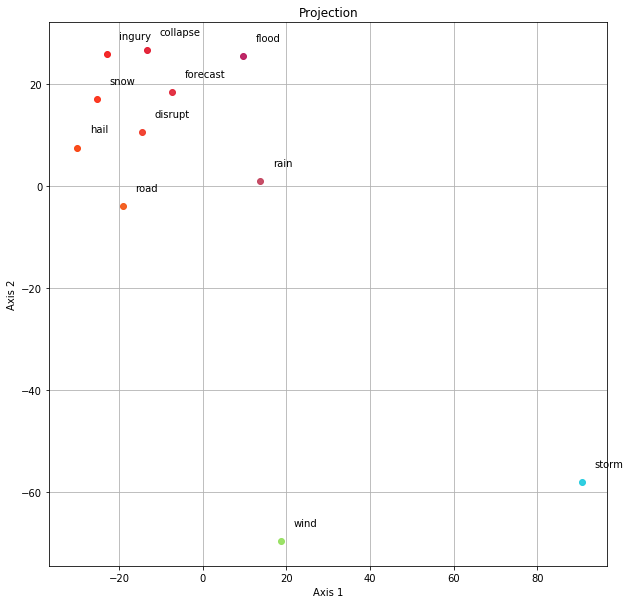

In [16]:
# Let's run MDS based on the absolute counts of the keyword occurrences
mds1 = MDS(n_components = 2, random_state=110)
mds1.fit(kw_abs_counts)
xy_mds1 = mds1.fit_transform(kw_abs_counts)

# Let us visualize the result in a scatter plot
plt.figure(figsize=(10,10))
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.title('Projection')
colors = [(0,0,0)]
for i in range(len(xy_mds1)):
    plt.scatter(xy_mds1[i,0], xy_mds1[i,1], alpha = .9, c=getColor(xy_mds1[i,0], xy_mds1[i,1], 
                                                                 xy_mds1[:,0].min(), xy_mds1[:,0].max(), 
                                                                 xy_mds1[:,1].min(), xy_mds1[:,1].max()))

for i in range(len(xy_mds1)):
    plt.text(xy_mds1[i,0]+3, xy_mds1[i,1]+3,kw.Name[i])
    
plt.grid()    

## Task: observe and interpret the spatial distribution of the dots in the plot
Does the distribution include spatial clusters? Spatial Outliers? What do they mean? Which keywords have similar hourly occurrences? Which keywords are very dissimilar to all others (in terms of the hourly occurrences)? 

### Visualise the temporal profiles of the keyword occurrence
We build a line graph (or line plot) where there is a line for each keyword showing the temporal variation of the number of the keyword occurrences. The lines are painted in the same colours as the dots in the projection plot. Hence, the colours of the lines indicate the positions of the data items in the projection.

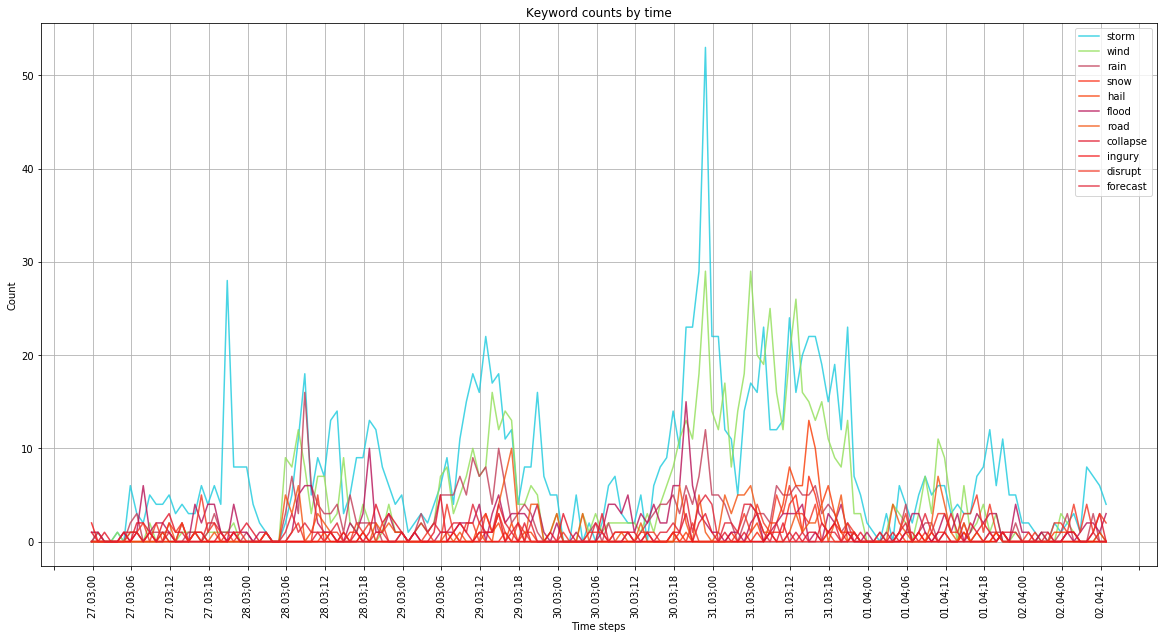

In [17]:
plt.figure(figsize=(20,10))
plt.xlabel('Time steps')
plt.ylabel('Count')
plt.title('Keyword counts by time')

i=0
for index, row in kw_abs_counts.iterrows():
    plt.plot(kw_abs_counts.columns, row,  alpha = .8, 
            color=getColor(xy_mds1[i,0], xy_mds1[i,1],
                           xy_mds1[:,0].min(), xy_mds1[:,0].max(),
                           xy_mds1[:,1].min(), xy_mds1[:,1].max()), 
            label=row.name)
    i=i+1

plt.legend()
plt.xticks(rotation=90)
start, end = plt.xlim()
plt.xticks(np.arange(start+2, end, 6))
plt.grid()
   
plt.show()

## Task: use the line graph to explain the patterns observed in the spatialisation
The line graph shows the data from which the spatialisation was derived. It allows you to understand the similarities and differences between the data items that lead to the particular spatial arrangement of the dots in the projection.

### Selection of regions in the projection plot for detailed examination of the data
In the absence of interactive tools to select data directly in a visual distplay, we shall simulate interactive selection of regions in the projection plot for a more detailed examination of the data corresponding to the points contained in these regions. In plotting the data, we use an "if" statement for selecting the rows to plot according to the coordinates of the corresponding points in the projection.

### Please edit the conditions in the "if" statement to select and inspect different regions of the projection plot!


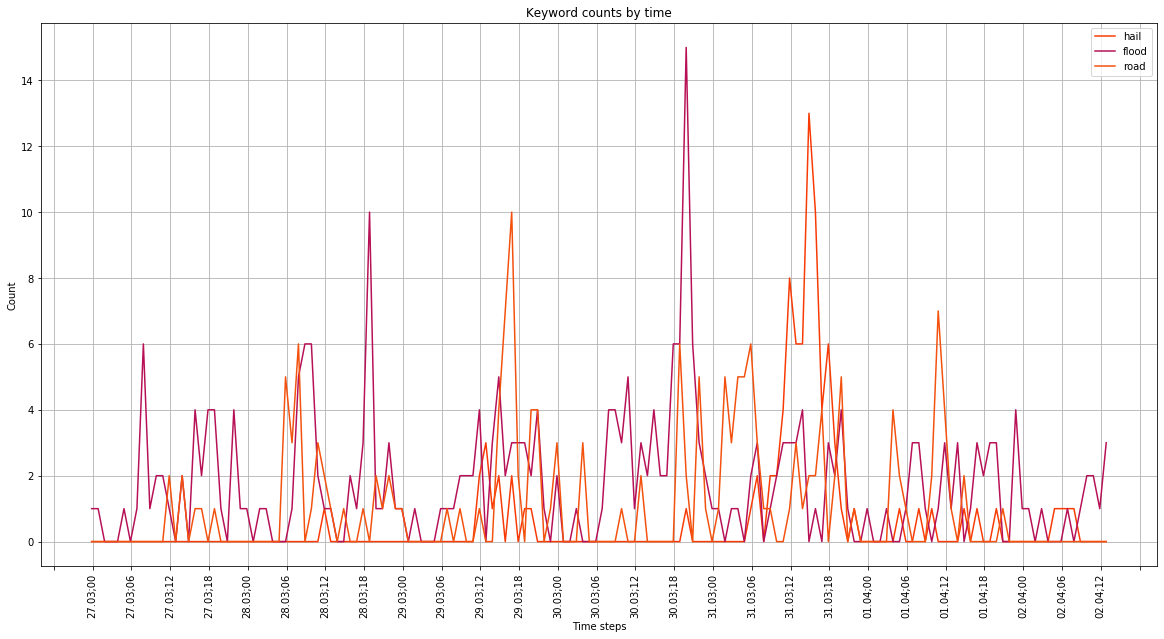

In [18]:
plt.figure(figsize=(20,10))
plt.xlabel('Time steps')
plt.ylabel('Count')
plt.title('Keyword counts by time')

i=0
for index, row in kw_abs_counts.iterrows():
    if (xy_mds1[i,0]<0 and xy_mds1[i,1]<10) or (xy_mds1[i,0]>0 and xy_mds1[i,1]>20) : 
        # Edit these conditions to select other regions
            plt.plot(kw_abs_counts.columns, row, 
                    color=getColor(xy_mds1[i,0], xy_mds1[i,1],
                                   xy_mds1[:,0].min(), xy_mds1[:,0].max(),
                                   xy_mds1[:,1].min(), xy_mds1[:,1].max()), 
                label=row.name)
    i=i+1

plt.legend()
plt.xticks(rotation=90)
start, end = plt.xlim()
plt.xticks(np.arange(start+2, end, 6))
plt.grid()
   
plt.show()

### Spatialisation of keywords according to the hourly percentages of the occurrences
We apply the same sequence of operations to the selection of the columns with the percentages as we previously did for the columns with the absolute counts. We create a 2D projection, observe the spatial distribution of the dots, and try to understand the similarities and differences between the data items using a line graph.

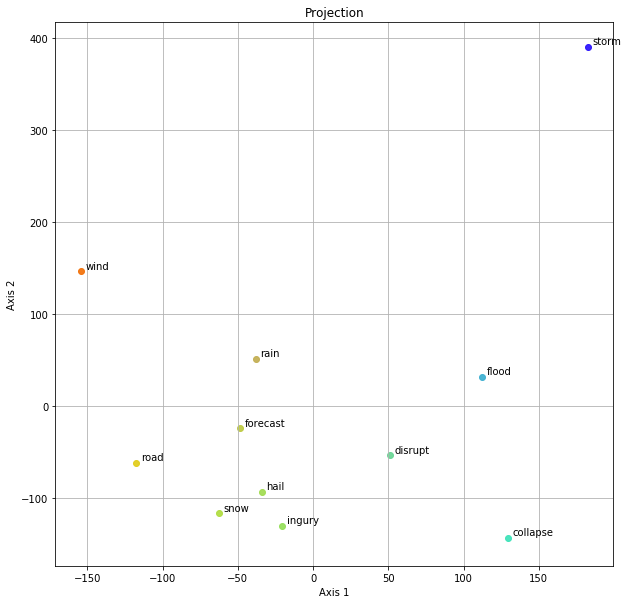

In [19]:
# Let's now run MDS based on the percentages of the keyword occurrences
mds2 = MDS(n_components = 2, random_state=102)
mds2.fit(kw_percentages)
xy_mds2 = mds2.fit_transform(kw_percentages)

# Let us visualize the result in a scatter plot
plt.figure(figsize=(10,10))
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.title('Projection')
colors = [(0,0,0)]
for i in range(len(xy_mds2)):
    plt.scatter(xy_mds2[i,0], xy_mds2[i,1], alpha = .9, c=getColor(xy_mds2[i,0], xy_mds2[i,1], 
                                                                 xy_mds2[:,0].min(), xy_mds2[:,0].max(), 
                                                                 xy_mds2[:,1].min(), xy_mds2[:,1].max()))

for i in range(len(xy_mds2)):
    plt.text(xy_mds2[i,0]+3, xy_mds2[i,1]+3,kw.Name[i])

plt.grid()

## Task: compare the projections obtained from the absolute counts and from the percentages
What are the major differences between the projections, particularly, in terms of the presence of spatial clusters and outliers?

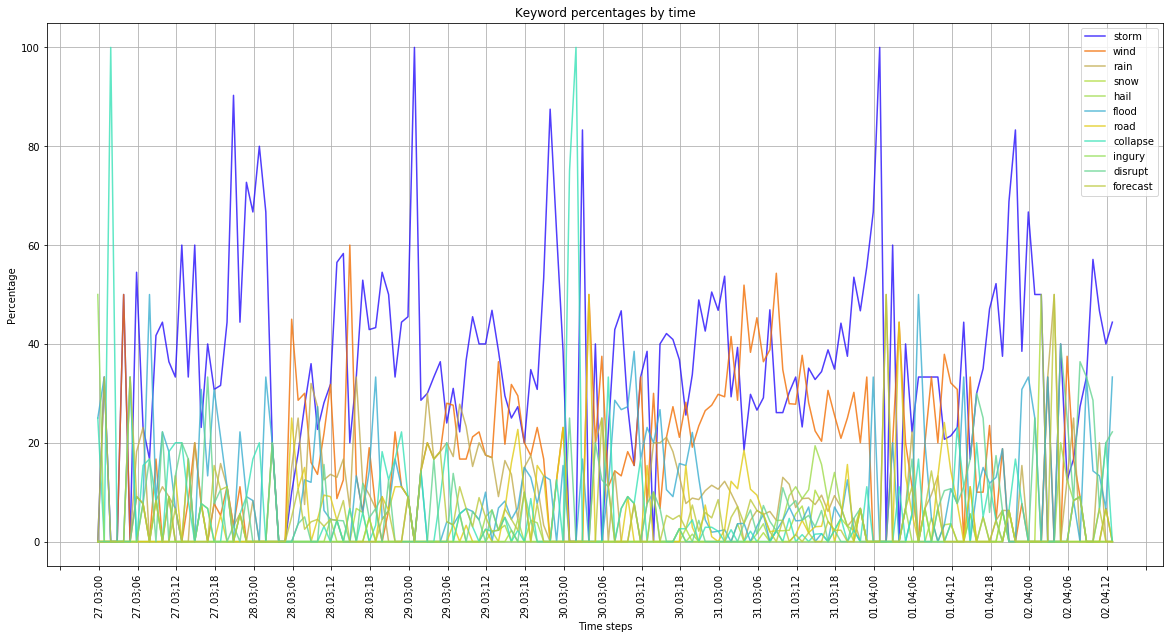

In [20]:
plt.figure(figsize=(20,10))
plt.xlabel('Time steps')
plt.ylabel('Percentage')
plt.title('Keyword percentages by time')

i=0
for index, row in kw_percentages.iterrows():
    plt.plot(kw_percentages.columns, row,  alpha = .8,
            color=getColor(xy_mds2[i,0], xy_mds2[i,1],
                           xy_mds2[:,0].min(), xy_mds2[:,0].max(),
                           xy_mds2[:,1].min(), xy_mds2[:,1].max()), 
            label=row.name)
    i=i+1
    
plt.legend()
plt.xticks(rotation=90)
start, end = plt.xlim()
plt.xticks(np.arange(start+2, end, 6))
plt.grid()

plt.show()

## Task: note the differences between the line graphs showing the absolute counts and the percentages
There aren't so large differences between the percentages as there are between the absolute counts. How is this difference related to the differences between the spatial distributions of the dots in the corresponding projections? 

### Selection of regions in the projection plot for detailed examination of the data
Like for the previous projection plot, we shall select plot regions for detailed examination using an "if" statement in the code for plotting lines in the line graph.

### Please edit the conditions in the "if" statement to select and inspect different regions of the projection plot!


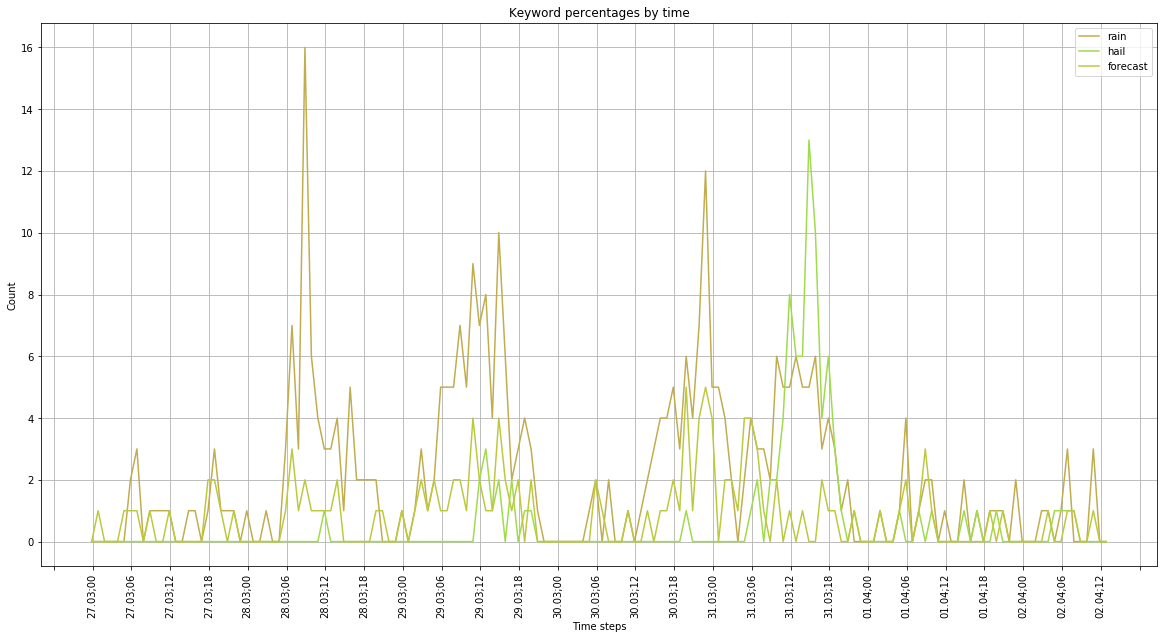

In [21]:
plt.figure(figsize=(20,10))
plt.xlabel('Time steps')
plt.ylabel('Count')
plt.title('Keyword percentages by time')

i=0
for index, row in kw_abs_counts.iterrows():
    if xy_mds2[i,0]>-100 and xy_mds2[i,0]<0 and xy_mds2[i,1]>-100 and xy_mds2[i,1]<100 :
        # Edit these conditions to select other regions
        plt.plot(kw_percentages.columns, row, 
                color=getColor(xy_mds2[i,0], xy_mds2[i,1],
                               xy_mds2[:,0].min(), xy_mds2[:,0].max(),
                               xy_mds2[:,1].min(), xy_mds2[:,1].max()), 
                label=row.name)
    i=i+1

plt.legend()
plt.xticks(rotation=90)
start, end = plt.xlim()
plt.xticks(np.arange(start+2, end, 6))
plt.grid()
   
plt.show()

# 2) Spatialisation of time steps

### Transposition of the data
To apply spatialisation to the hourly time steps instead of the keywords, we transpose the data tables so that the time steps correspond to table rows and keywords to the columns. We do the transposition for the absolute counts and for the percentages.

In [22]:
# Let us transpose the columns containing the absolute counts
counts_by_time = kw_abs_counts.T
counts_by_time.columns=kw.iloc[:, 0]
counts_by_time.head()

id,storm,wind,rain,snow,hail,flood,road,collapse,ingury,disrupt,forecast
27.03;00,0,0,0,0,0,1,0,1,2,0,0
27.03;01,1,0,0,0,0,1,0,0,0,0,1
27.03;02,0,0,0,0,0,0,0,1,0,0,0
27.03;03,0,0,0,0,0,0,0,0,0,0,0
27.03;04,1,1,0,0,0,0,0,0,0,0,0


In [23]:
# Let us transpose the columns containing the percentages
perc_by_time = kw_percentages.T
perc_by_time.columns=kw.iloc[:, 0]
perc_by_time.head()

id,storm,wind,rain,snow,hail,flood,road,collapse,ingury,disrupt,forecast
27.03;00,0.0,0.0,0.0,0.0,0.0,25.0,0.0,25.0,50.0,0.0,0.0
27.03;01,33.3,0.0,0.0,0.0,0.0,33.3,0.0,0.0,0.0,0.0,33.3
27.03;02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
27.03;03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27.03;04,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Application of MDS to the time steps characterised by the absolute keyword counts

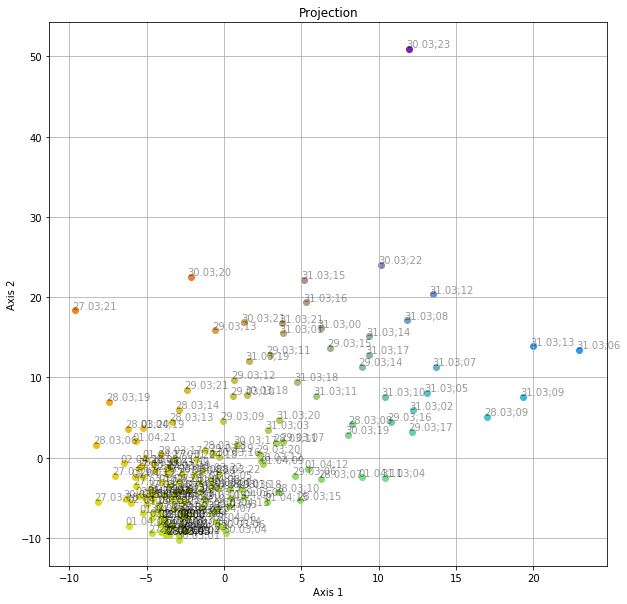

In [24]:
# Let's apply MDS to the transposed table with the counts
mds3 = MDS(n_components = 2, random_state=17)
mds3.fit(counts_by_time)
xy_mds3 = mds3.fit_transform(counts_by_time)

# Let us visualize the result in a scatter plot
plt.figure(figsize=(10,10))
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.title('Projection')
colors = [(0,0,0)]
for i in range(len(xy_mds3)):
    plt.scatter(xy_mds3[i,0], xy_mds3[i,1], alpha = .9, c=getColor(xy_mds3[i,0], xy_mds3[i,1], 
                                                                 xy_mds3[:,0].min(), xy_mds3[:,0].max(), 
                                                                 xy_mds3[:,1].min(), xy_mds3[:,1].max()))

# Connecting consecutive points by lines
#plt.plot(xy_mds3[:,0],xy_mds3[:,1], linestyle=':')  

for i in range(len(xy_mds3)):
    plt.text(xy_mds3[i,0]-0.2, xy_mds3[i,1]+0.2,counts_by_time.index[i], alpha = .4)
    
plt.grid()    

## Task: observe and interpret the spatial distribution of the dots in the plot
Do you observe occurrences of the following types of spatial patterns: cluster, dense concentration, spatial outlier, sparsely filled region, density trend? What do these patterns tell you in terms of similarities and differences between the time steps?

### Visualise the temporal distribution of the similarities and differences
We build a 2D time display (time matrix) where the horizontal axis (matrix columns) corresponds to the hours of a day and the vertical axis to the sequence of the days. For each day and hour, we draw a square mark painted in the colour that corresponds to the position of this time step in the projection. Hence, we use colour propagation to acreate a visual link between the projection display and the time matrix. We can observe visual patterns in the distribution of the colours over the time matrix and interpret these patterns as periods of stability and moderate or large changes. 

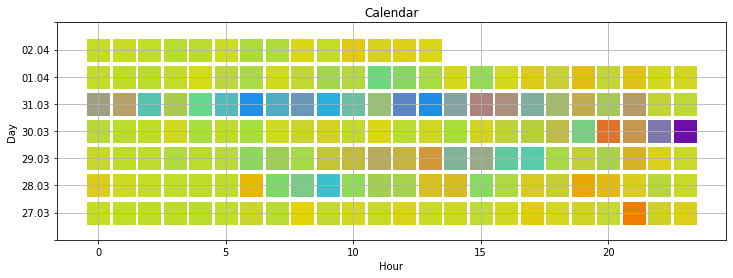

In [25]:
plt.figure(figsize=(12,4))
plt.xlabel('Hour')
plt.ylabel('Day')
plt.title('Calendar')
colors = [(0,0,0)]

plt.grid()

for i in range(len(xy_mds3)):
    plt.scatter(i%24, i//24, alpha = 1, s=500, marker='s', 
                c=getColor(xy_mds3[i,0], xy_mds3[i,1],
                           xy_mds3[:,0].min(), xy_mds3[:,0].max(),
                           xy_mds3[:,1].min(), xy_mds3[:,1].max()))
days = [""]
for d in dates:
    if days[-1]!=d[0:5]:
        days.append(d[0:5])

locs, labels = plt.yticks() 
plt.yticks(locs,days)
    
plt.show()    

## Task: observe and interpret patterns in the distribution of the colours over the time matrix.

### Visualise the keyword occurrence profiles of the time steps
We build a line graph (or line plot) where there is a line for each time step showing the corresponding counts of the keyword occurrences. The lines are painted in the same colours as the dots in the projection plot. Hence, the colours of the lines indicate the positions of the data items in the projection.

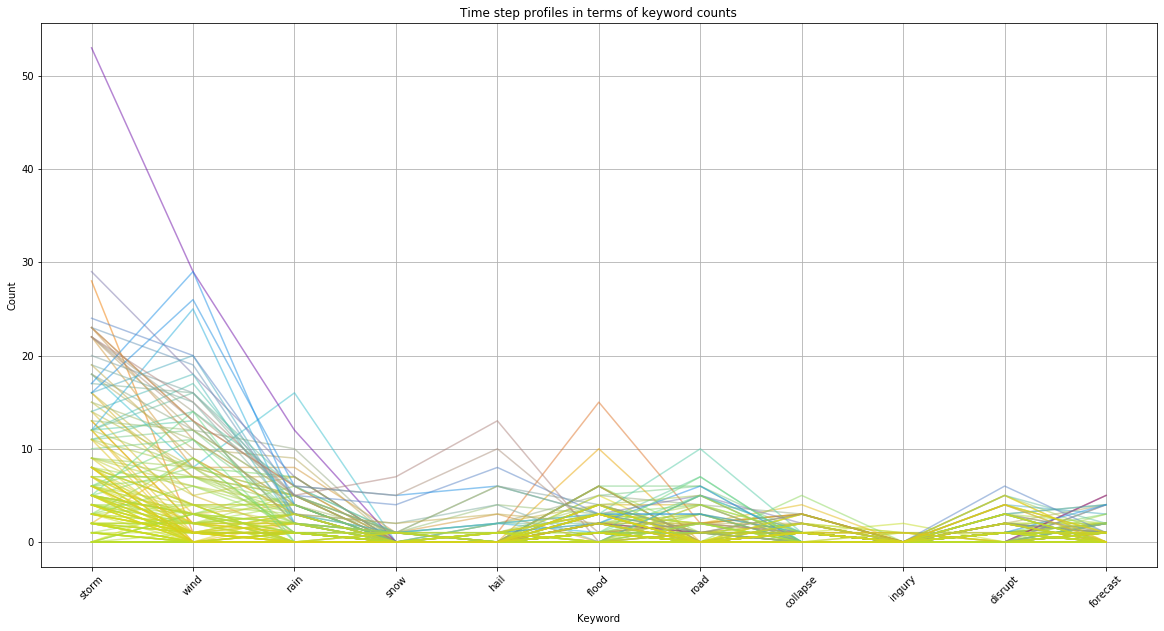

In [26]:
plt.figure(figsize=(20,10))
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Time step profiles in terms of keyword counts')

i=0
for index, row in counts_by_time.iterrows():
    plt.plot(counts_by_time.columns, row, alpha = .5,  
            color=getColor(xy_mds3[i,0], xy_mds3[i,1],
                           xy_mds3[:,0].min(), xy_mds3[:,0].max(),
                           xy_mds3[:,1].min(), xy_mds3[:,1].max()), 
            label=row.name)
    i=i+1

#plt.legend()
plt.xticks(rotation=45)
plt.grid()
   
plt.show()

## Task: use the line graph to explain the patterns seen in the projection plot and time matrix

What can you say about the bulk of the data? Occurrences of which keywords differentiate the data items most? Can you roughly associate some regions of the plot with keywords that occur more frequently than usual?

### Selection of regions in the projection plot for detailed examination of the data
Like previously, we shall select plot regions for detailed examination using an "if" statement in the code for plotting lines in the line graph.

### Please edit the conditions in the "if" statement to select and inspect different regions of the projection plot!


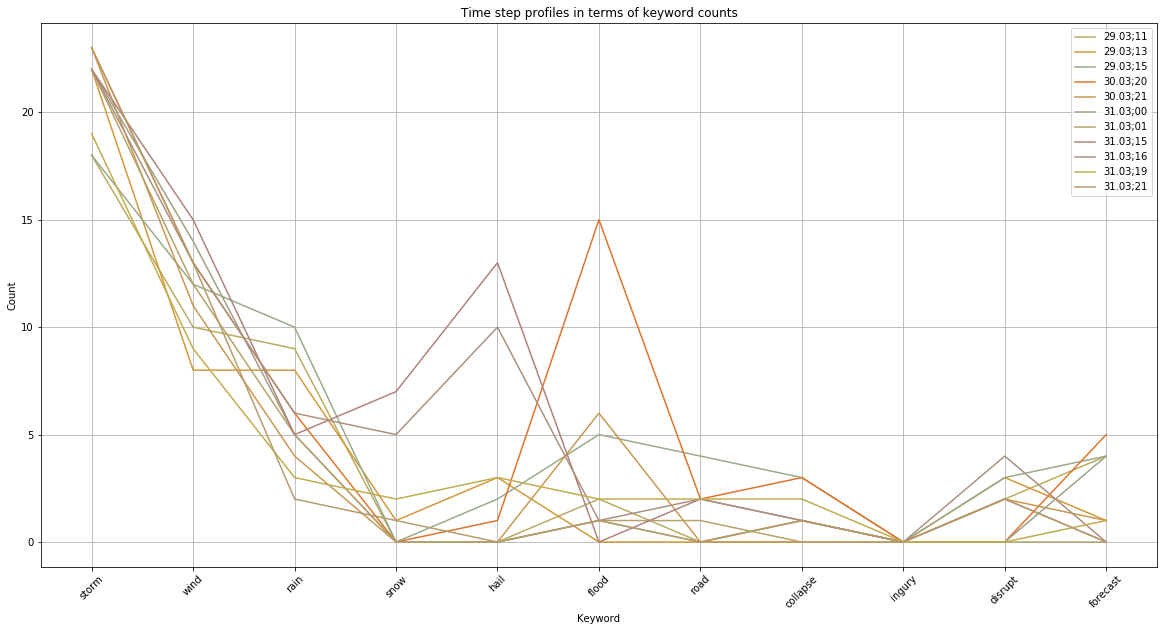

In [27]:
plt.figure(figsize=(20,10))
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Time step profiles in terms of keyword counts')

i=0
for index, row in counts_by_time.iterrows():
    #if xy_mds3[i,0]<-10 and xy_mds3[i,1]>-3 :
    if xy_mds3[i,0]>-5 and xy_mds3[i,0]<7 and xy_mds3[i,1]>10 :
        # Edit these conditions to select other regions
        plt.plot(counts_by_time.columns, row, 
                color=getColor(xy_mds3[i,0], xy_mds3[i,1],
                               xy_mds3[:,0].min(), xy_mds3[:,0].max(),
                               xy_mds3[:,1].min(), xy_mds3[:,1].max()), 
                label=row.name)
    i=i+1

plt.legend()
plt.xticks(rotation=45)
plt.grid()
   
plt.show()

### Application of MDS to the time steps characterised by the relative keyword frequencies

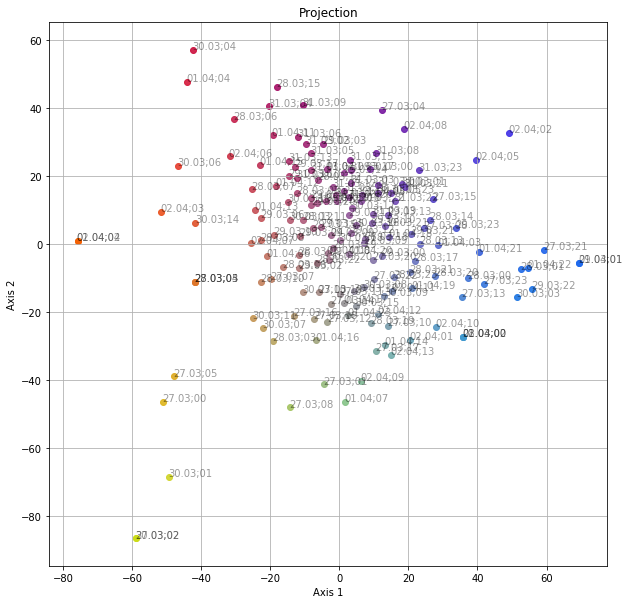

In [28]:
# Let's apply MDS to the transposed table with the percentages
mds4 = MDS(n_components = 2, random_state=2)
mds4.fit(perc_by_time)
xy_mds4 = mds4.fit_transform(perc_by_time)

# Let us visualize the result in a scatter plot
plt.figure(figsize=(10,10))
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.title('Projection')
colors = [(0,0,0)]
for i in range(len(xy_mds4)):
    plt.scatter(xy_mds4[i,0], xy_mds4[i,1], alpha = .9, c=getColor(xy_mds4[i,0], xy_mds4[i,1], 
                                                                 xy_mds4[:,0].min(), xy_mds4[:,0].max(), 
                                                                 xy_mds4[:,1].min(), xy_mds4[:,1].max()))

# Connecting consecutive points by lines
#plt.plot(xy_mds4[:,0],xy_mds4[:,1], linestyle=':')  

for i in range(len(xy_mds4)):
    plt.text(xy_mds4[i,0]-0.2, xy_mds4[i,1]+0.2,counts_by_time.index[i], alpha=.4)
    
plt.grid()

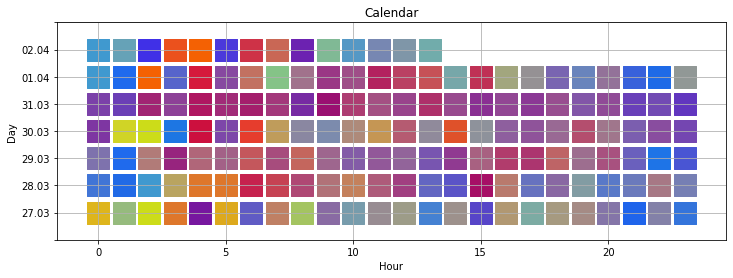

In [29]:
plt.figure(figsize=(12,4))
plt.xlabel('Hour')
plt.ylabel('Day')
plt.title('Calendar')
colors = [(0,0,0)]

plt.grid()

for i in range(len(xy_mds4)):
    plt.scatter(i%24, i//24, alpha = 1, s=500, marker='s', 
                c=getColor(xy_mds4[i,0], xy_mds4[i,1],
                           xy_mds4[:,0].min(), xy_mds4[:,0].max(),
                           xy_mds4[:,1].min(), xy_mds4[:,1].max()))

locs, labels = plt.yticks() 
plt.yticks(locs,days)
    
plt.show()    


## Task: compare the projections obtained from the absolute counts and from the percentages
What are the major differences between the projections in terms of the variation of the spatial density and the presence of spatial clusters and outliers? What are the differences between the time matrices linked to the projections? Which matrix exhibits more understandable patterns of colour propagation?

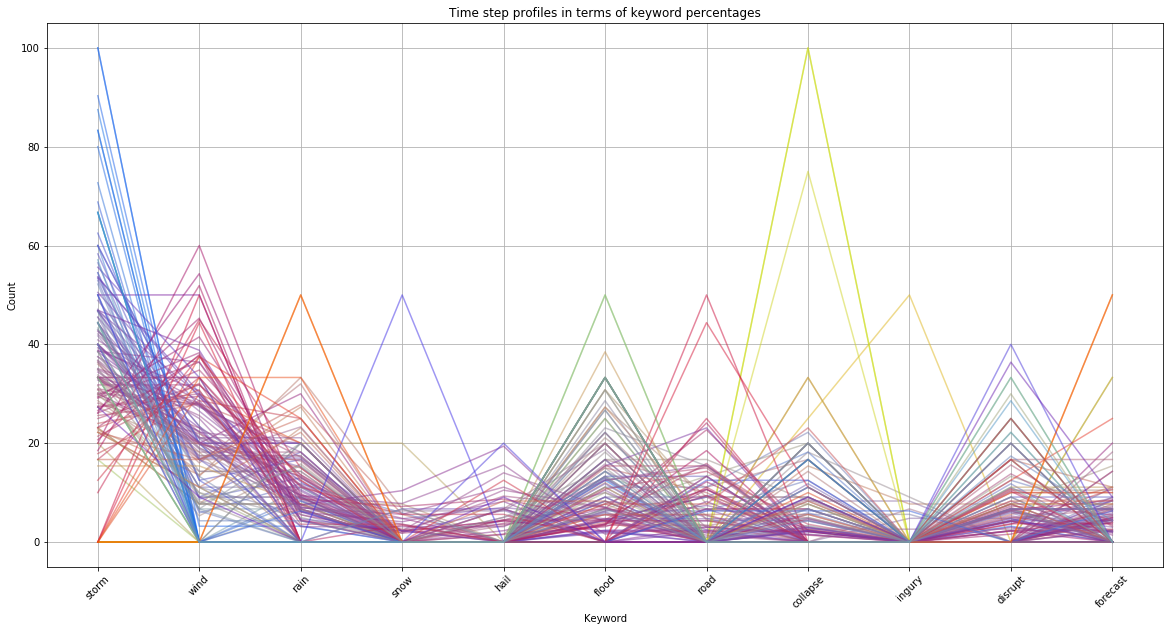

In [30]:
plt.figure(figsize=(20,10))
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Time step profiles in terms of keyword percentages')

i=0
for index, row in perc_by_time.iterrows():
    plt.plot(perc_by_time.columns, row, alpha=0.5, 
            color=getColor(xy_mds4[i,0], xy_mds4[i,1],
                           xy_mds4[:,0].min(), xy_mds4[:,0].max(),
                           xy_mds4[:,1].min(), xy_mds4[:,1].max()), 
            label=row.name)
    i=i+1

#plt.legend()
plt.xticks(rotation=45)
plt.grid()
   
plt.show()

## Task: as previously, try to relate the differences in the projection plots for the counts and percentages to the differences in the corresponding line graphs.

### Selection of regions in the projection plot for detailed examination of the data

### Please edit the conditions in the "if" statement to select and inspect different regions of the projection plot!

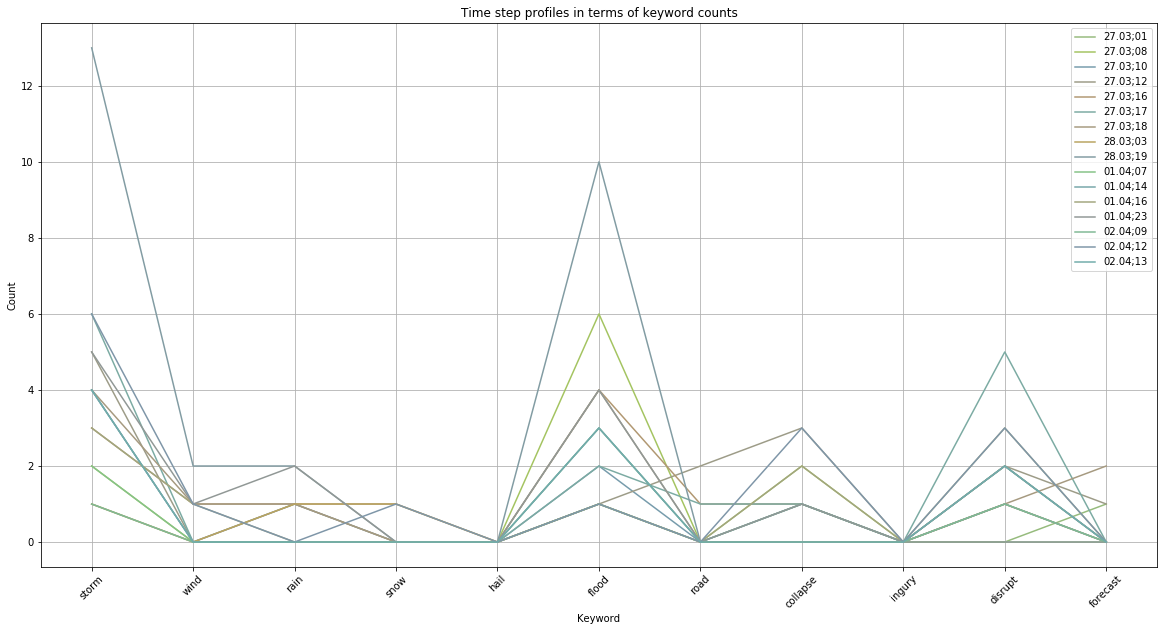

In [31]:
plt.figure(figsize=(20,10))
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Time step profiles in terms of keyword counts')

i=0
for index, row in counts_by_time.iterrows():
    if xy_mds4[i,0]>=-20 and xy_mds4[i,0]<=20 and xy_mds4[i,1]<=-20 :
        # Edit these conditions to select other regions
        plt.plot(perc_by_time.columns, row, 
                color=getColor(xy_mds4[i,0], xy_mds4[i,1],
                               xy_mds4[:,0].min(), xy_mds4[:,0].max(),
                               xy_mds4[:,1].min(), xy_mds4[:,1].max()), 
            label=row.name)
    i=i+1

plt.legend()
plt.xticks(rotation=45)
plt.grid()
   
plt.show()